In [1]:
import dataset
from importlib import reload
import skimage
import numpy as np

D:\Github\smlm-dl\smlm_dl\dataset.py:220: RuntimeWarning: divide by zero encountered in log
  im = axes[1].imshow(np.log(tiled_images))


7:	 [x = 13.642,], [y = -3.154,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 528.692,], [bg = 29.155,],
11:	 [x = 2.972,], [y = 8.452,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 988.236,], [bg = 25.716,],
10:	 [x = -1.875,], [y = 3.600,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1173.448,], [bg = 46.757,],
1:	 [x = -7.230,], [y = -5.415,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 830.756,], [bg = 6.039,],
0:	 [x = -1.990,], [y = 4.811,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1201.819,], [bg = 57.873,],
9:	 [x = 13.454,], [y = -9.883,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 986.113,], [bg = 40.494,],
6:	 [x = -6.190,], [y = -1.712,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1773.617,], [bg = 75.390,],
8:	 [x = -2.174,], [y = 2.635,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1279.991,], [bg = 57.951,],


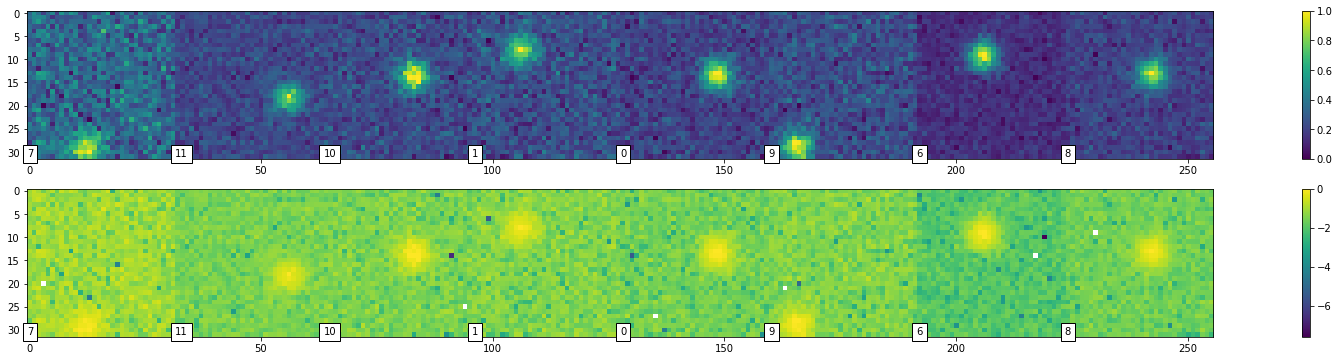

In [2]:
reload(dataset)
a = dataset.Gaussian2DPSFDataset(length=16,)# augmentations={})
dataset.inspect_images(a)

D:\Github\smlm-dl\smlm_dl\dataset.py:220: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


11:	 [x = -2.218,], [y = -1.771,], [A = 1087.193,], [bg = 73.179,],
0:	 [x = 3.719,], [y = 7.554,], [A = 861.062,], [bg = 61.651,],
4:	 [x = 5.468,], [y = 9.769,], [A = 1523.788,], [bg = 55.541,],
6:	 [x = 2.334,], [y = -8.473,], [A = 1319.173,], [bg = 24.416,],
2:	 [x = 3.842,], [y = 6.265,], [A = 657.471,], [bg = 17.960,],
12:	 [x = -1.407,], [y = 7.101,], [A = 1644.842,], [bg = 47.162,],
9:	 [x = -8.906,], [y = -2.333,], [A = 725.167,], [bg = 95.320,],
3:	 [x = 9.093,], [y = -2.988,], [A = 1079.425,], [bg = 23.448,],


D:\Github\smlm-dl\smlm_dl\zernike.py:84: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(-y_lim, y_lim)


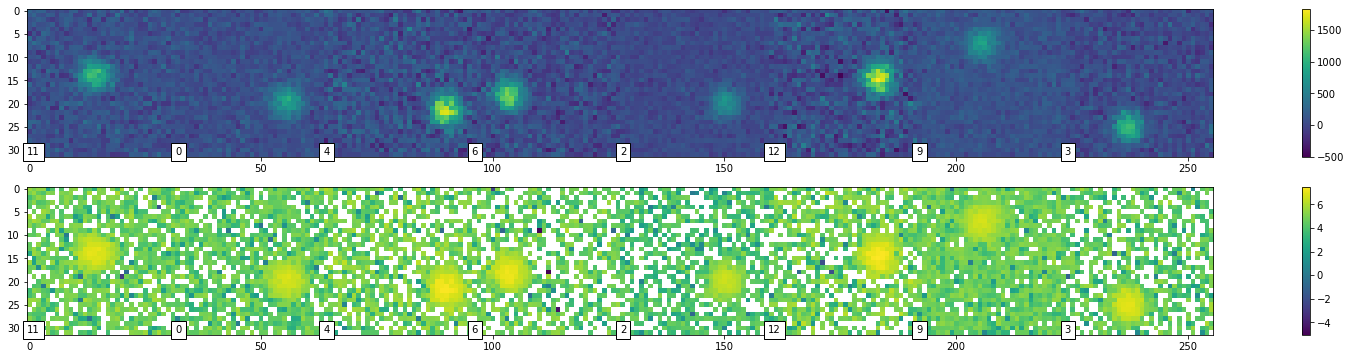

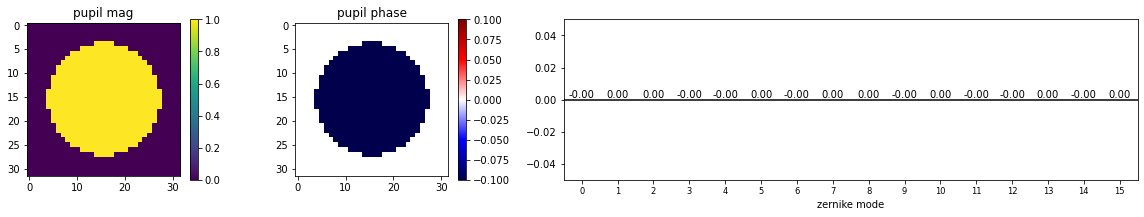

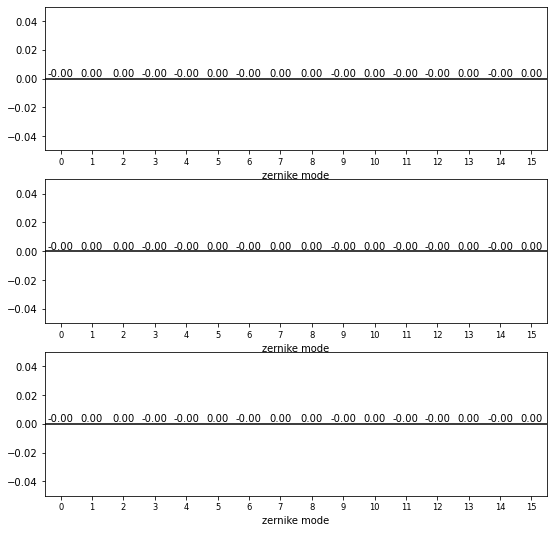

In [3]:
reload(dataset)
import zernike
reload(zernike)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    out_size=(32,32),
                                    psf_zerns={0:0},#, 1:1, 2:0.2, 4:1, 5:2, 7:-2, 9:3},
                                    noise_params={},
                                    augmentations={dataset.Augmentation.NOISE_GAUSSIAN:0.1},
                                    normalize=False) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)



import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(9, 9))
zernike.plot_zernike_coeffs(axes[0], zernike.fit_zernike_from_pupil(a.pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(a.pupil), np.abs(a.pupil) <=0)
corrected_pupil = np.abs(a.pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[1], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(corrected_pupil), np.abs(corrected_pupil) <=0)
corrected_pupil = np.abs(corrected_pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[2], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

9:	 [x = 3.155,], [y = -8.659,], [A = 925.376,], [bg = 68.462,],
6:	 [x = 0.957,], [y = -13.268,], [A = 824.149,], [bg = 16.805,],
5:	 [x = 2.766,], [y = -3.558,], [A = 786.123,], [bg = 5.799,],
11:	 [x = -1.732,], [y = -6.855,], [A = 1031.452,], [bg = 18.793,],
7:	 [x = -10.280,], [y = 5.415,], [A = 1185.575,], [bg = 87.205,],
13:	 [x = 3.989,], [y = 6.617,], [A = 1583.355,], [bg = 78.146,],
10:	 [x = 2.941,], [y = -6.963,], [A = 707.238,], [bg = 2.974,],
12:	 [x = -8.960,], [y = 12.371,], [A = 1595.725,], [bg = 96.527,],


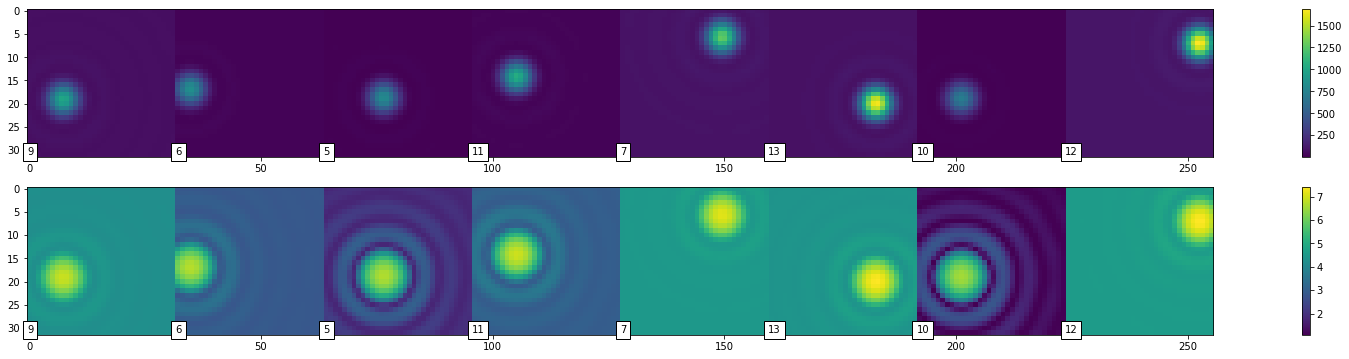

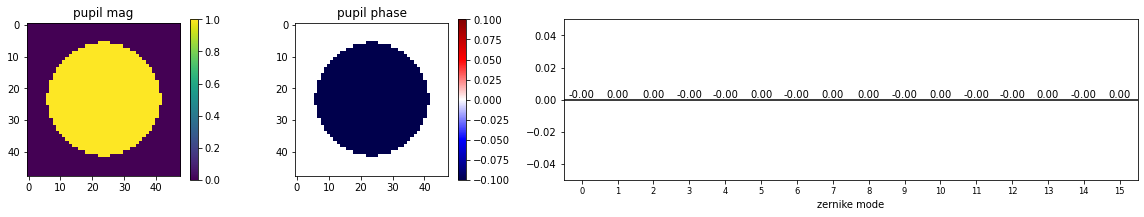

In [4]:
reload(dataset)

a = dataset.FourierOptics2DPSFDataset(length=16,
                                      # psf_zerns={1:0, 5:2},
                                      noise_params={},
                                      normalize=False,
                                     # psf_params={'pupil_scale':1},
                                     ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)

11:	 [x = -0.766,], [y = -2.207,], [z = 8.797,], [A = 1695.223,], [bg = 67.038,],
9:	 [x = -5.653,], [y = 3.436,], [z = 8.438,], [A = 1821.692,], [bg = 53.853,],
10:	 [x = -7.872,], [y = 8.771,], [z = -0.232,], [A = 509.090,], [bg = 68.763,],
1:	 [x = 0.726,], [y = 4.367,], [z = 1.878,], [A = 758.647,], [bg = 88.298,],
5:	 [x = 4.223,], [y = -8.467,], [z = -2.012,], [A = 1274.207,], [bg = 44.243,],
4:	 [x = -3.721,], [y = -11.440,], [z = -2.838,], [A = 1069.078,], [bg = 42.915,],
14:	 [x = 5.472,], [y = 3.908,], [z = -3.994,], [A = 1956.464,], [bg = 41.246,],
6:	 [x = -4.846,], [y = 5.406,], [z = 3.093,], [A = 856.452,], [bg = 78.587,],


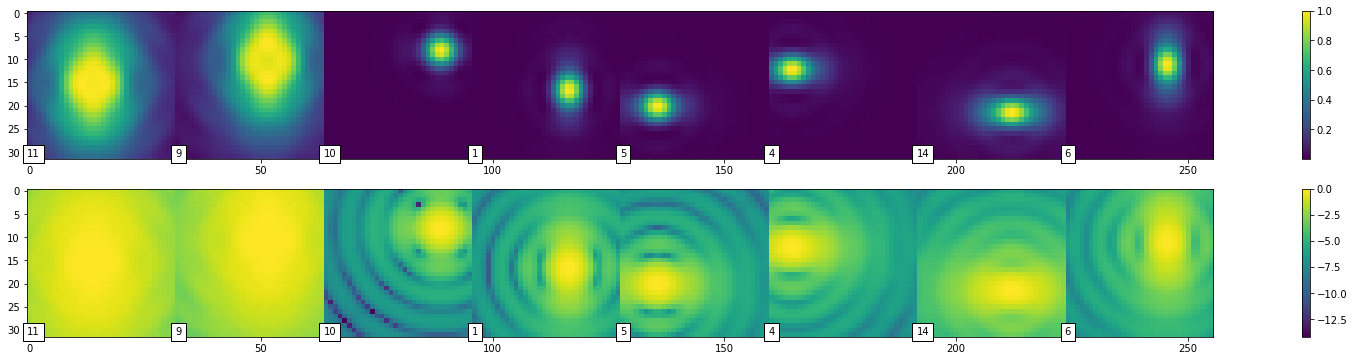

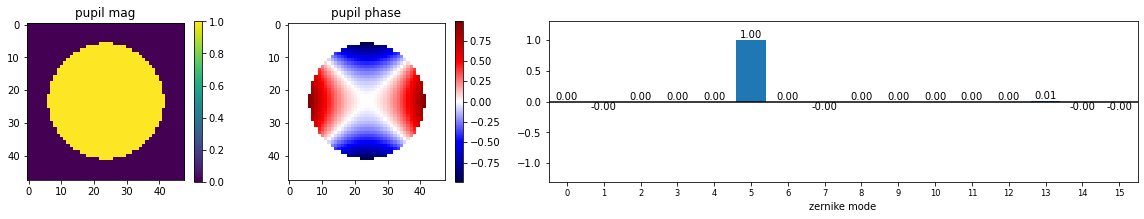

In [5]:
reload(dataset)

a = dataset.FourierOptics3DPSFDataset(length=16, psf_zerns={1:0, 5:1}, noise_params={}) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)

5:	 [x = -10.291, -16.343, -15.259, -13.479, -5.722, -15.306, -8.027, -7.020,], [y = 21.848, -8.837, -2.741, -2.050, -3.633, 7.094, -2.962, 5.713,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [A = 564.604, 766.748, 513.934, 780.569, 887.585, 1343.409, 586.068, 662.798,], [bg = 46.538,],
6:	 [x = 10.723, 14.743, 11.587, 19.006, 24.460, 14.950, 13.566, 5.038,], [y = -13.149, 1.895, 7.048, 5.093, -9.412, 5.193, -3.113, 1.770,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [A = 1363.609, 1160.602, 784.116, 1073.036, 1004.172, 1169.822, 759.731, 1672.185,], [bg = 15.591,],
2:	 [x = -2.846, -10.801, -14.105, 12.632, 13.555, -10.247, 10.975, -14.609,], [y = -5.887, 10.728, 11.529, -6.276, -9.271, 21.039, -4.192, 5.535,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000,

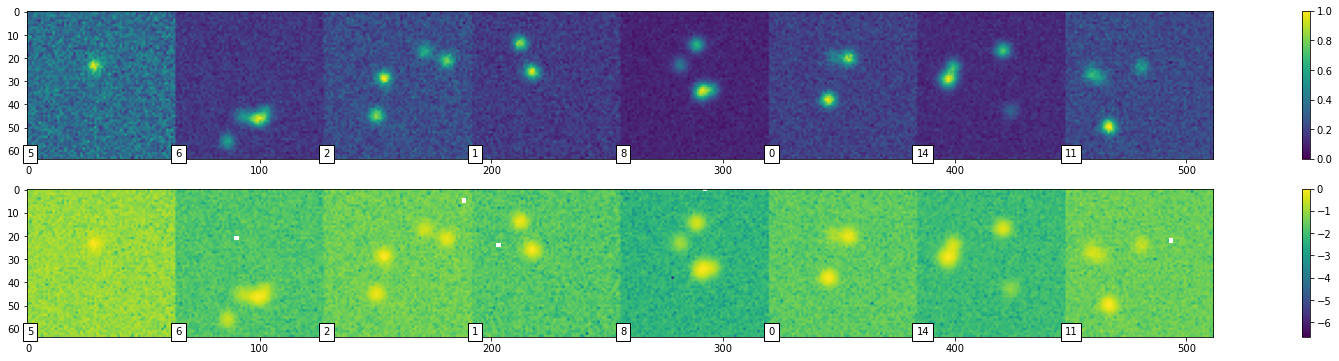

In [6]:
reload(dataset)

a = dataset.Gaussian2DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, )
dataset.inspect_images(a)

12:	 [x = -2.372, 4.324, -3.749, 6.824, 2.703, 8.285, 13.072, 11.153,], [y = -18.692, -12.192, -2.746, -19.976, 8.512, 7.763, -0.660, -9.832,], [z = -3.869, 3.989, -2.509, 7.105, 0.189, -6.026, -9.181, 9.801,], [A = 1821.543, 597.099, 1559.581, 1347.734, 1193.263, 1884.651, 1287.707, 693.589,], [bg = 94.019,],
14:	 [x = -23.461, -19.812, -7.134, -7.684, -8.925, -5.239, 0.898, 2.084,], [y = 10.085, -4.189, 9.982, 1.508, -0.861, 8.484, 2.532, -8.061,], [z = -5.042, -5.305, 6.217, -1.473, 2.556, 2.833, 4.227, -9.954,], [A = 1397.252, 579.857, 1090.679, 1354.052, 1882.299, 1760.797, 1158.292, 1823.984,], [bg = 2.935,],
13:	 [x = 5.904, 0.921, 6.870, -12.301, 8.196, 15.556, 16.277, -10.646,], [y = -6.818, -1.001, 1.233, 6.276, 0.458, 8.790, 12.794, -0.413,], [z = -9.273, 1.436, -6.024, 7.368, -5.058, -5.740, -2.302, -6.148,], [A = 1087.361, 517.556, 1661.519, 1126.569, 1424.475, 952.420, 1942.768, 826.969,], [bg = 76.726,],
5:	 [x = -1.574, -11.599, 14.127, 8.794, 18.289, 20.575, 2.138, 10.

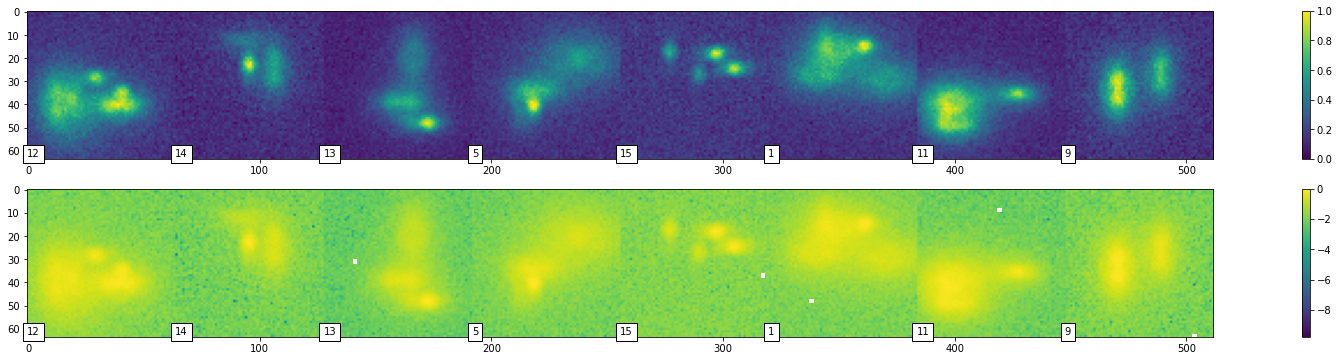

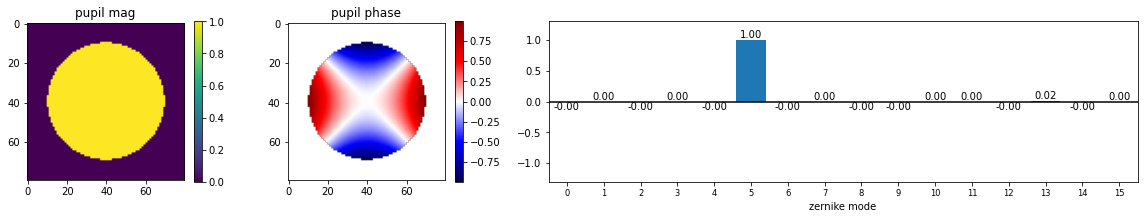

In [7]:
reload(dataset)

a = dataset.FourierOptics3DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, psf_zerns={1:0, 5:1}, ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())
for key, val in a.params.items():
    print(val.shape)

4:	 [x = -3.531,], [y = 1.866,],
6:	 [x = -2.228,], [y = 1.190,],
3:	 [x = -4.176,], [y = 1.608,],
5:	 [x = -4.612,], [y = 1.910,],
0:	 [x = -2.748,], [y = -3.086,],
1:	 [x = 3.572,], [y = -3.893,],
2:	 [x = 2.389,], [y = -4.758,],
7:	 [x = 1.148,], [y = -0.633,],


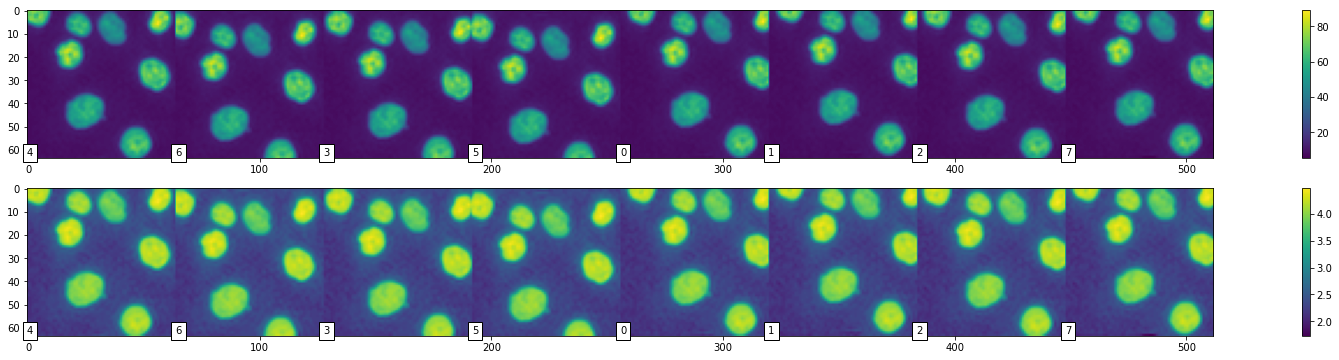

In [8]:
reload(dataset)

a = dataset.SingleImageDataset(skimage.data.human_mitosis()[20:, 20:], out_size=(64,64), length=8,
                               img_params={'shifts':[5, 5],
                                           # 'conv':np.ones((3,3)),
                                          },
                               noise_params={}, augmentations={}, normalize=False)
dataset.inspect_images(a)